importing required libraries and Module

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

RFM Analysis (Simulated Customer Transactions):-
RFM analysis, standing for Recency, Frequency, and Monetary value, is a powerful data mining technique used to segment customers based on their transaction behavior.

In [2]:
# Simulated transaction data
np.random.seed(42)
customer_ids = np.random.randint(1000, 1020, 100)
invoice_dates = [dt.datetime(2023, 1, 1) + dt.timedelta(days=int(x)) for x in np.random.randint(0, 365, 100)]
amounts = np.random.randint(20, 500, 100)

df = pd.DataFrame({
    "CustomerID": customer_ids,
    "InvoiceDate": invoice_dates,
    "Amount": amounts
})

#use case date
NOW = dt.datetime(2025, 4, 15)

# RFM Metrics
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (NOW - x.max()).days,
    "CustomerID": "count",
    "Amount": "sum"
})

rfm.columns = ["Recency", "Frequency", "Monetary"]
print(rfm.head())

            Recency  Frequency  Monetary
CustomerID                              
1000            490          5      1055
1001            477          6      1712
1002            581          5      1185
1003            496          6      2374
1004            676          3      1010


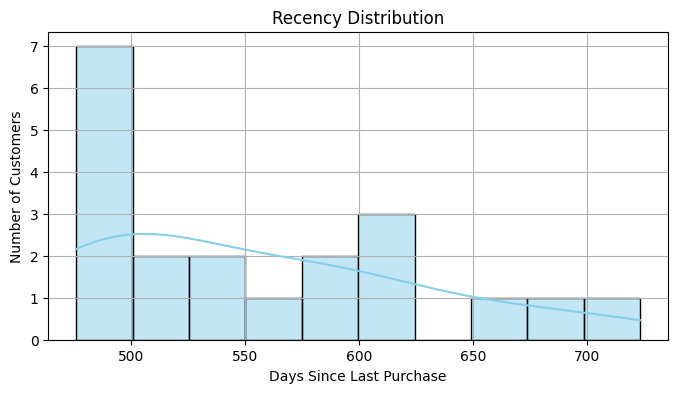

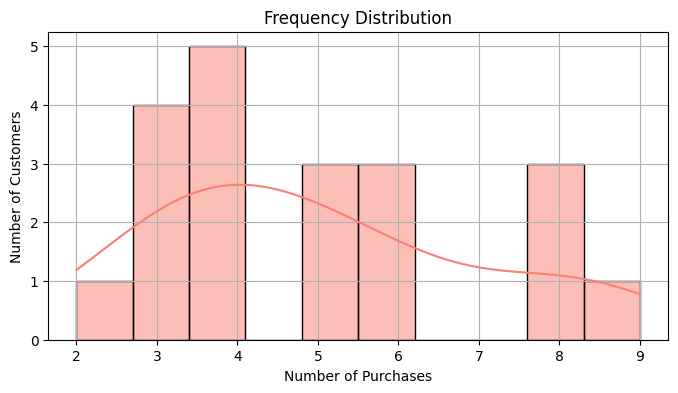

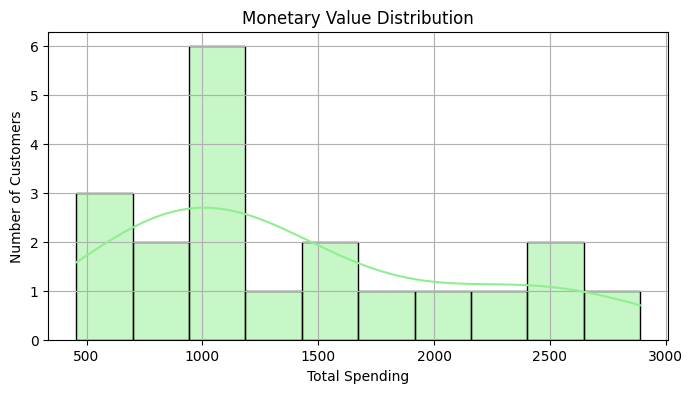

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

rfm_reset = rfm.reset_index()
plt.figure(figsize=(8, 4))
sns.histplot(rfm_reset['Recency'], bins=10, kde=True, color='skyblue')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

# Frequency Distribution
plt.figure(figsize=(8, 4))
sns.histplot(rfm_reset['Frequency'], bins=10, kde=True, color='salmon')
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

#Monetary Distribution
plt.figure(figsize=(8, 4))
sns.histplot(rfm_reset['Monetary'], bins=10, kde=True, color='lightgreen')
plt.title('Monetary Value Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()


Recent vs. inactive customers.

Frequent buyers vs. occasional shoppers.

Customers with high vs. low spending.